Link to Google Drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1.Loading and Displaying Datasets from Google Drive

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# File paths in your Drive
csv_file_path = '/content/drive/My Drive/ML_Project/heart.csv'
dat_file_path = '/content/drive/My Drive/ML_Project/heart.dat'

# Load the heart.csv dataset
heart_csv = pd.read_csv(csv_file_path)
print("Heart CSV Dataset:")
print(heart_csv.head())

# Load the heart.dat dataset
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_dat = pd.read_csv(dat_file_path, sep='\s+', header=None, names=columns)
print("\nHeart DAT Dataset:")
print(heart_dat.head())




Mounted at /content/drive
Heart CSV Dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Heart DAT Dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  70.0  1.0  4.0     130.0  322.0  0.0      2.0    109.0    0.0      2.4   
1  67.0  0.0  3.0     115.0  564.0  0.0      2.0    160.0    0.0      1.6   
2  57.0  1.0  2.0     124.0  261.0  0.0      0.0    141.0    0.0      0.3   
3  64.0 

2.Baseline Model Training Tuning

In [10]:
# Import necessary libraries
from google.colab import drive
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Mount Google Drive
drive.mount('/content/drive')

# File paths in your Drive
csv_file_path = '/content/drive/My Drive/ML_Project/heart.csv'
dat_file_path = '/content/drive/My Drive/ML_Project/heart.dat'

# Load the heart.csv dataset
heart_csv = pd.read_csv(csv_file_path)
print("Heart CSV Dataset:")
print(heart_csv.head())

# Load the heart.dat dataset
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_dat = pd.read_csv(dat_file_path, sep='\s+', header=None, names=columns)
print("\nHeart DAT Dataset:")
print(heart_dat.head())

# Data Preprocessing for heart.csv dataset
X_csv = heart_csv.drop(columns=['target'])
y_csv = heart_csv['target']
X_csv = pd.get_dummies(X_csv, drop_first=True)
scaler = StandardScaler()
X_csv = scaler.fit_transform(X_csv)
X_csv_train, X_csv_test, y_csv_train, y_csv_test = train_test_split(X_csv, y_csv, test_size=0.2, random_state=42)

# Data Preprocessing for heart.dat dataset
X_dat = heart_dat.drop(columns=['target'])
y_dat = heart_dat['target']
X_dat = pd.get_dummies(X_dat, drop_first=True)
X_dat = scaler.fit_transform(X_dat)
X_dat_train, X_dat_test, y_dat_train, y_dat_test = train_test_split(X_dat, y_dat, test_size=0.2, random_state=42)

# Baseline model training for heart.csv
rf_csv = RandomForestClassifier(random_state=42)
rf_csv.fit(X_csv_train, y_csv_train)
y_csv_pred = rf_csv.predict(X_csv_test)
print("Baseline Results on heart.csv dataset:")
print("Accuracy:", accuracy_score(y_csv_test, y_csv_pred))
print("Classification Report:\n", classification_report(y_csv_test, y_csv_pred))

# Baseline model training for heart.dat
rf_dat = RandomForestClassifier(random_state=42)
rf_dat.fit(X_dat_train, y_dat_train)
y_dat_pred = rf_dat.predict(X_dat_test)
print("\nBaseline Results on heart.dat dataset:")
print("Accuracy:", accuracy_score(y_dat_test, y_dat_pred))
print("Classification Report:\n", classification_report(y_dat_test, y_dat_pred))

# Hyperparameter tuning using GridSearchCV for heart.csv
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_csv = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_csv.fit(X_csv_train, y_csv_train)
best_model_csv = grid_search_csv.best_estimator_
y_csv_pred_optimized = best_model_csv.predict(X_csv_test)
print("\nOptimized Model Results on heart.csv dataset:")
print("Best Parameters:", grid_search_csv.best_params_)
print("Accuracy:", accuracy_score(y_csv_test, y_csv_pred_optimized))
print("Classification Report:\n", classification_report(y_csv_test, y_csv_pred_optimized))

# Hyperparameter tuning using GridSearchCV for heart.dat
grid_search_dat = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_dat.fit(X_dat_train, y_dat_train)
best_model_dat = grid_search_dat.best_estimator_
y_dat_pred_optimized = best_model_dat.predict(X_dat_test)
print("\nOptimized Model Results on heart.dat dataset:")
print("Best Parameters:", grid_search_dat.best_params_)
print("Accuracy:", accuracy_score(y_dat_test, y_dat_pred_optimized))
print("Classification Report:\n", classification_report(y_dat_test, y_dat_pred_optimized))

# RandomizedSearchCV for heart.csv
param_dist = {
    'n_estimators': [int(x) for x in range(50, 200)],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [int(x) for x in range(2, 15)]
}
random_search_csv = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search_csv.fit(X_csv_train, y_csv_train)
y_csv_pred_randomized = random_search_csv.best_estimator_.predict(X_csv_test)
print("\nOptimized Model Results using RandomizedSearchCV on heart.csv dataset:")
print("Best Parameters:", random_search_csv.best_params_)
print("Accuracy:", accuracy_score(y_csv_test, y_csv_pred_randomized))
print("Classification Report:\n", classification_report(y_csv_test, y_csv_pred_randomized))

# RandomizedSearchCV for heart.dat
random_search_dat = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search_dat.fit(X_dat_train, y_dat_train)
y_dat_pred_randomized = random_search_dat.best_estimator_.predict(X_dat_test)
print("\nOptimized Model Results using RandomizedSearchCV on heart.dat dataset:")
print("Best Parameters:", random_search_dat.best_params_)
print("Accuracy:", accuracy_score(y_dat_test, y_dat_pred_randomized))
print("Classification Report:\n", classification_report(y_dat_test, y_dat_pred_randomized))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Heart CSV Dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Heart DAT Dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  70.0  1.0  4.0     130.0  322.0  0.0      2.0    109.0    0.0      2.4   
1  67.0  0.0  3.0     115.0  564.0  0.0      2.0    160.0  

3.Heart Disease Prediction - Model Training and Hyperparameter Tuning

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Heart CSV Dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Heart DAT Dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  70.0  1.0  4.0     130.0  322.0  0.0      2.0    109.0    0.0      2.4   
1  67.0  0.0  3.0     115.0  564.0  0.0      2.0    160.0  

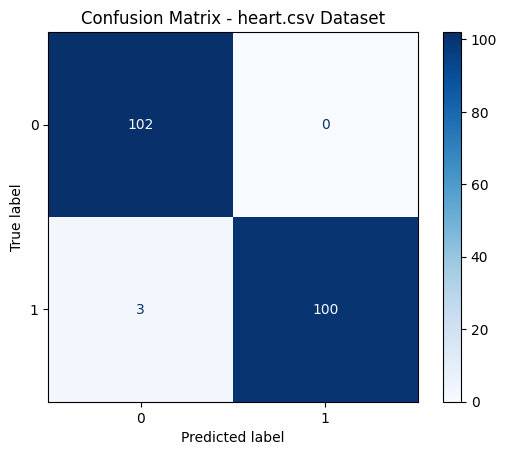


Baseline Results on heart.dat dataset:
Accuracy: 0.7962962962962963
Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.88      0.84        33
           2       0.78      0.67      0.72        21

    accuracy                           0.80        54
   macro avg       0.79      0.77      0.78        54
weighted avg       0.79      0.80      0.79        54



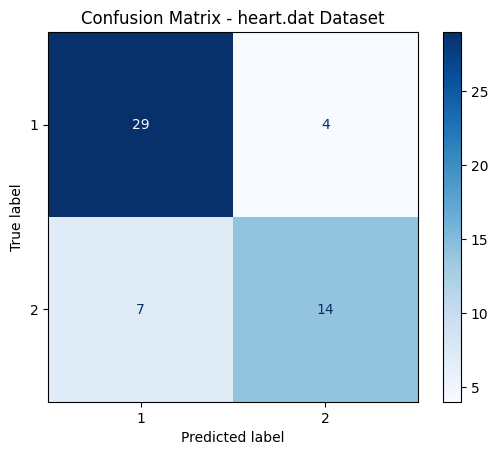

In [13]:
# Import necessary libraries
from google.colab import drive
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# File paths in your Drive
csv_file_path = '/content/drive/My Drive/ML_Project/heart.csv'
dat_file_path = '/content/drive/My Drive/ML_Project/heart.dat'

# Load the heart.csv dataset
heart_csv = pd.read_csv(csv_file_path)
print("Heart CSV Dataset:")
print(heart_csv.head())

# Load the heart.dat dataset
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_dat = pd.read_csv(dat_file_path, sep='\s+', header=None, names=columns)
print("\nHeart DAT Dataset:")
print(heart_dat.head())

# Data Preprocessing for heart.csv dataset
# Separate features and target from the heart.csv dataset
X_csv = heart_csv.drop(columns=['target'])  # Assuming 'target' is the label column in heart.csv
y_csv = heart_csv['target']

# One-hot encode categorical features if needed
X_csv = pd.get_dummies(X_csv, drop_first=True)

# Standardize the dataset
scaler = StandardScaler()
X_csv = scaler.fit_transform(X_csv)

# Split dataset into train and test sets
X_csv_train, X_csv_test, y_csv_train, y_csv_test = train_test_split(X_csv, y_csv, test_size=0.2, random_state=42)

# Data Preprocessing for heart.dat dataset
# Separate features and target from the heart.dat dataset
X_dat = heart_dat.drop(columns=['target'])
y_dat = heart_dat['target']

# One-hot encode categorical features if needed
X_dat = pd.get_dummies(X_dat, drop_first=True)

# Standardize the dataset
X_dat = scaler.fit_transform(X_dat)

# Split dataset into train and test sets
X_dat_train, X_dat_test, y_dat_train, y_dat_test = train_test_split(X_dat, y_dat, test_size=0.2, random_state=42)

# Baseline model training on heart.csv
rf_csv = RandomForestClassifier(random_state=42)
rf_csv.fit(X_csv_train, y_csv_train)
y_csv_pred = rf_csv.predict(X_csv_test)

print("\nBaseline Results on heart.csv dataset:")
print("Accuracy:", accuracy_score(y_csv_test, y_csv_pred))
print("Classification Report:\n", classification_report(y_csv_test, y_csv_pred))

# Confusion Matrix for heart.csv
ConfusionMatrixDisplay.from_estimator(rf_csv, X_csv_test, y_csv_test, cmap="Blues")
plt.title("Confusion Matrix - heart.csv Dataset")
plt.savefig("confusion_matrix_csv.png")
plt.show()

# Baseline model training on heart.dat
rf_dat = RandomForestClassifier(random_state=42)
rf_dat.fit(X_dat_train, y_dat_train)
y_dat_pred = rf_dat.predict(X_dat_test)

print("\nBaseline Results on heart.dat dataset:")
print("Accuracy:", accuracy_score(y_dat_test, y_dat_pred))
print("Classification Report:\n", classification_report(y_dat_test, y_dat_pred))

# Confusion Matrix for heart.dat
ConfusionMatrixDisplay.from_estimator(rf_dat, X_dat_test, y_dat_test, cmap="Blues")
plt.title("Confusion Matrix - heart.dat Dataset")
plt.savefig("confusion_matrix_dat.png")
plt.show()



Deep Learning Model - MLP for datasets

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load heart.csv dataset
csv_file_path = '/content/drive/My Drive/ML_Project/heart.csv'
heart_csv = pd.read_csv(csv_file_path)

# Separate features and target from the heart.csv dataset
X_csv = heart_csv.drop(columns=['target'])  # Assuming 'target' is the label column in heart.csv
y_csv = heart_csv['target']

# One-hot encode categorical features if needed
X_csv = pd.get_dummies(X_csv, drop_first=True)

# Standardize the dataset
scaler = StandardScaler()
X_csv = scaler.fit_transform(X_csv)

# Split dataset into train and test sets
X_csv_train, X_csv_test, y_csv_train, y_csv_test = train_test_split(X_csv, y_csv, test_size=0.2, random_state=42)

# Step 4a: Deep Learning Model - MLP for heart.csv dataset
# Define the MLP model for heart.csv
mlp_model_csv = Sequential([
    Dense(128, activation='relu', input_shape=(X_csv_train.shape[1],)),  # First hidden layer with 128 neurons, ReLU activation
    Dense(64, activation='relu'),  # Second hidden layer with 64 neurons, ReLU activation
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
mlp_model_csv.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
mlp_model_csv.fit(X_csv_train, y_csv_train, epochs=50, batch_size=16, validation_data=(X_csv_test, y_csv_test))

# Predict using the test set
y_pred_prob_csv = mlp_model_csv.predict(X_csv_test)
y_mlp_pred_csv = (y_pred_prob_csv > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Evaluate model performance
print("\nDeep Learning MLP Model Results on heart.csv dataset:")
print("Accuracy:", accuracy_score(y_csv_test, y_mlp_pred_csv))
print("Classification Report:\n", classification_report(y_csv_test, y_mlp_pred_csv))

# Load heart.dat dataset
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
dat_file_path = '/content/drive/My Drive/ML_Project/heart.dat'
heart_dat = pd.read_csv(dat_file_path, sep='\s+', header=None, names=columns)

# Separate features and target from the heart.dat dataset
X_dat = heart_dat.drop(columns=['target'])
y_dat = heart_dat['target']

# One-hot encode categorical features if needed
X_dat = pd.get_dummies(X_dat, drop_first=True)

# Standardize the dataset
X_dat = scaler.fit_transform(X_dat)

# Split dataset into train and test sets
X_dat_train, X_dat_test, y_dat_train, y_dat_test = train_test_split(X_dat, y_dat, test_size=0.2, random_state=42)

# Step 4b: Deep Learning Model - MLP for heart.dat dataset
# Define the MLP model for heart.dat
mlp_model_dat = Sequential([
    Dense(128, activation='relu', input_shape=(X_dat_train.shape[1],)),  # First hidden layer with 128 neurons, ReLU activation
    Dense(64, activation='relu'),  # Second hidden layer with 64 neurons, ReLU activation
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
mlp_model_dat.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
mlp_model_dat.fit(X_dat_train, y_dat_train, epochs=50, batch_size=16, validation_data=(X_dat_test, y_dat_test))

# Predict using the test set
y_pred_prob_dat = mlp_model_dat.predict(X_dat_test)
y_mlp_pred_dat = (y_pred_prob_dat > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Evaluate model performance
print("\nDeep Learning MLP Model Results on heart.dat dataset:")
print("Accuracy:", accuracy_score(y_dat_test, y_mlp_pred_dat))
print("Classification Report:\n", classification_report(y_dat_test, y_mlp_pred_dat))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6936 - loss: 0.5816 - val_accuracy: 0.8098 - val_loss: 0.4228
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8638 - loss: 0.3280 - val_accuracy: 0.8146 - val_loss: 0.3890
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8753 - loss: 0.3115 - val_accuracy: 0.8244 - val_loss: 0.3753
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9113 - loss: 0.2306 - val_accuracy: 0.8585 - val_loss: 0.3346
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9171 - loss: 0.2368 - val_accuracy: 0.8634 - val_loss: 0.3152
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9274 - loss: 0.1948 - val_accuracy: 0.8732 - val_loss: 0.2867
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9506 - loss: 0.1613 - val_accuracy: 0.8976 - val_loss: 0.2632
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9453 - loss: 0.1736 - val_accuracy: 0.8732 - val_loss:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4275 - loss: 0.5057 - val_accuracy: 0.6111 - val_loss: -0.3590
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5653 - loss: -0.7966 - val_accuracy: 0.6111 - val_loss: -1.3324
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5462 - loss: -2.1147 - val_accuracy: 0.6111 - val_loss: -2.5682
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5470 - loss: -4.1136 - val_accuracy: 0.6111 - val_loss: -4.4690
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5240 - loss: -7.2346 - val_accuracy: 0.6111 - val_loss: -7.5055
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5748 - loss: -10.9362 - val_accuracy: 0.6111 - val_loss: -12.1028
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5309 - loss: -20.3487 - val_accuracy: 0.6111 - val_loss: -19.4096
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5808 - loss: -29.4684 - val_accuracy: 0.6111 - 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Training and Evaluation

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load heart.csv dataset
heart_csv = pd.read_csv('/content/drive/My Drive/ML_Project/heart.csv')
X_csv = heart_csv.drop(columns=['target'])  # Features
y_csv = heart_csv['target']  # Target

# Standardize the features for heart.csv
scaler_csv = StandardScaler()
X_csv = scaler_csv.fit_transform(X_csv)

# Split dataset into training and testing sets for heart.csv
X_csv_train, X_csv_test, y_csv_train, y_csv_test = train_test_split(X_csv, y_csv, test_size=0.2, random_state=42)

# Train SVM on heart.csv dataset
svm_csv = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  # RBF kernel
svm_csv.fit(X_csv_train, y_csv_train)
y_csv_svm_pred = svm_csv.predict(X_csv_test)

# Evaluate the SVM model on heart.csv
print("\nSVM Results on heart.csv dataset:")
print("Accuracy:", accuracy_score(y_csv_test, y_csv_svm_pred))
print("Classification Report:\n", classification_report(y_csv_test, y_csv_svm_pred))


# Load heart.dat dataset
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_dat = pd.read_csv('/content/drive/My Drive/ML_Project/heart.dat', sep='\s+', header=None, names=columns)
X_dat = heart_dat.drop(columns=['target'])  # Features
y_dat = heart_dat['target']  # Target

# Standardize the features for heart.dat
scaler_dat = StandardScaler()
X_dat = scaler_dat.fit_transform(X_dat)

# Split dataset into training and testing sets for heart.dat
X_dat_train, X_dat_test, y_dat_train, y_dat_test = train_test_split(X_dat, y_dat, test_size=0.2, random_state=42)

# Train SVM on heart.dat dataset
svm_dat = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  # RBF kernel
svm_dat.fit(X_dat_train, y_dat_train)
y_dat_svm_pred = svm_dat.predict(X_dat_test)

# Evaluate the SVM model on heart.dat
print("\nSVM Results on heart.dat dataset:")
print("Accuracy:", accuracy_score(y_dat_test, y_dat_svm_pred))
print("Classification Report:\n", classification_report(y_dat_test, y_dat_svm_pred))



SVM Results on heart.csv dataset:
Accuracy: 0.8878048780487805
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205


SVM Results on heart.dat dataset:
Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.94      0.91        33
           2       0.89      0.81      0.85        21

    accuracy                           0.89        54
   macro avg       0.89      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54



flowchart for heart.csv

In [13]:

from graphviz import Digraph

# Define the flowchart for heart.csv preprocessing
dot_csv = Digraph()
dot_csv.node("A", "Raw Data (heart.csv)")
dot_csv.node("B", "Encoded")
dot_csv.node("C", "Standardized")
dot_csv.node("D", "Train-Test Split")
dot_csv.edges(["AB", "BC", "CD"])

# Save the flowchart locally
csv_save_path = "heart_csv_preprocessing.png"
dot_csv.render(csv_save_path[:-4], format="png", cleanup=True)
print(f"Flowchart for heart.csv saved locally at {csv_save_path}")

from google.colab import files
files.download("heart_csv_preprocessing.png")


Flowchart for heart.csv saved locally at heart_csv_preprocessing.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

flowchart for heart.dat

In [14]:
from graphviz import Digraph
from google.colab import files

# Define the flowchart for heart.dat preprocessing
dot_dat = Digraph()
dot_dat.node("A", "Raw Data (heart.dat)")
dot_dat.node("B", "Encoded")
dot_dat.node("C", "Standardized")
dot_dat.node("D", "Train-Test Split")
dot_dat.edges(["AB", "BC", "CD"])

# Save the flowchart locally
dat_save_path = "heart_dat_preprocessing.png"
dot_dat.render(dat_save_path[:-4], format="png", cleanup=True)
print(f"Flowchart for heart.dat saved locally at {dat_save_path}")

# Download the flowchart
files.download(dat_save_path)



Flowchart for heart.dat saved locally at heart_dat_preprocessing.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

integrated flowchart for both datasets

In [16]:
from graphviz import Digraph
from google.colab import files

# Define the integrated flowchart
dot_integrated = Digraph()
dot_integrated.node("A", "Raw Data (heart.csv, heart.dat)")
dot_integrated.node("B1", "Encoded (heart.csv)")
dot_integrated.node("B2", "Encoded (heart.dat)")
dot_integrated.node("C1", "Standardized (heart.csv)")
dot_integrated.node("C2", "Standardized (heart.dat)")
dot_integrated.node("D1", "Train-Test Split (heart.csv)")
dot_integrated.node("D2", "Train-Test Split (heart.dat)")

# Connect nodes for heart.csv
dot_integrated.edge("A", "B1")
dot_integrated.edge("B1", "C1")
dot_integrated.edge("C1", "D1")

# Connect nodes for heart.dat
dot_integrated.edge("A", "B2")
dot_integrated.edge("B2", "C2")
dot_integrated.edge("C2", "D2")

# Save the integrated flowchart locally
integrated_save_path = "integrated_preprocessing.png"
dot_integrated.render(integrated_save_path[:-4], format="png", cleanup=True)
print(f"Integrated flowchart saved locally at {integrated_save_path}")

# Download the flowchart
files.download(integrated_save_path)




Integrated flowchart saved locally at integrated_preprocessing.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Feature Importance Comparison

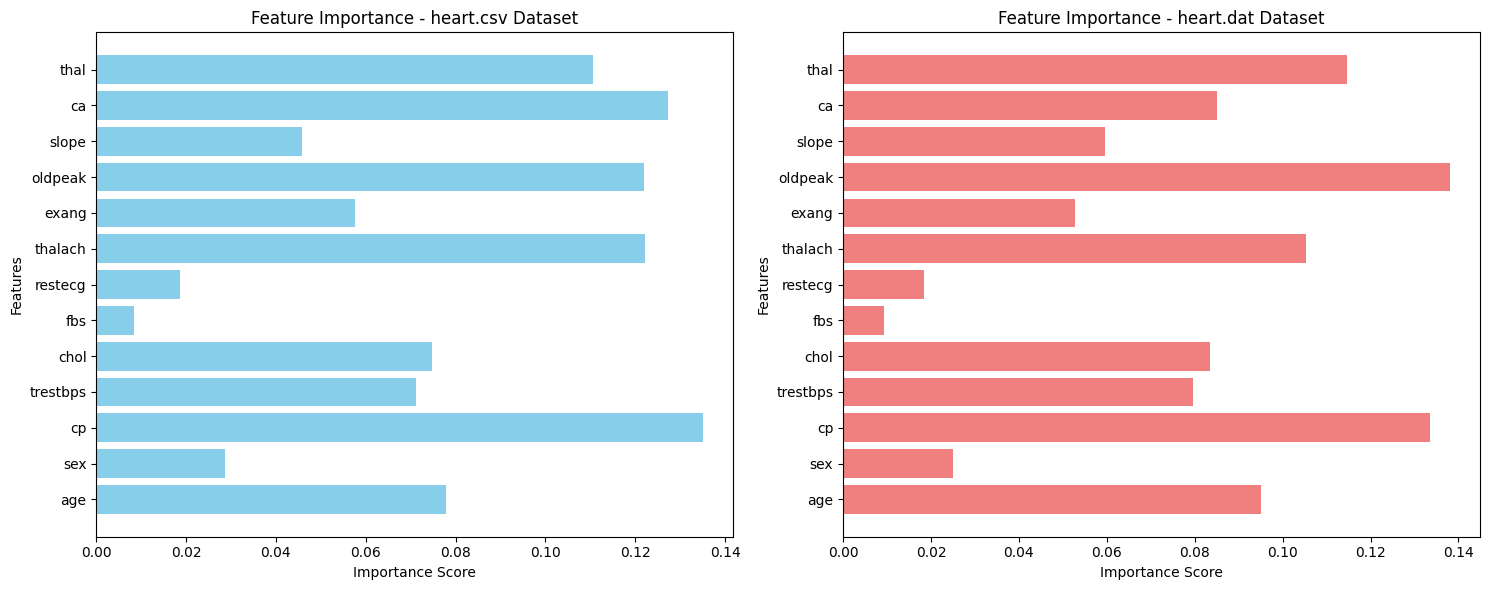

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance (Assuming rf_csv and rf_dat models are already trained)
csv_feature_importances = rf_csv.feature_importances_  # Feature importance from heart.csv model
dat_feature_importances = rf_dat.feature_importances_  # Feature importance from heart.dat model

# Features (Assuming preprocessed feature names are already available)
csv_features = heart_csv.drop(columns=['target']).columns  # Features of heart.csv dataset
dat_features = heart_dat.drop(columns=['target']).columns  # Features of heart.dat dataset

# Create subplots for side-by-side comparison
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot feature importance for heart.csv
axs[0].barh(csv_features, csv_feature_importances, color='skyblue')  # Horizontal bar chart
axs[0].set_title('Feature Importance - heart.csv Dataset')  # Title for heart.csv chart
axs[0].set_xlabel('Importance Score')  # Label for X-axis
axs[0].set_ylabel('Features')  # Label for Y-axis

# Plot feature importance for heart.dat
axs[1].barh(dat_features, dat_feature_importances, color='lightcoral')  # Horizontal bar chart
axs[1].set_title('Feature Importance - heart.dat Dataset')  # Title for heart.dat chart
axs[1].set_xlabel('Importance Score')  # Label for X-axis
axs[1].set_ylabel('Features')  # Label for Y-axis

# Adjust layout for better appearance
plt.tight_layout()

# Save the combined feature importance chart locally
plt.savefig('combined_feature_importance.png')  # Save as PNG file
plt.show()  # Display the chart



Baseline Results Analysis : Performance Comparison

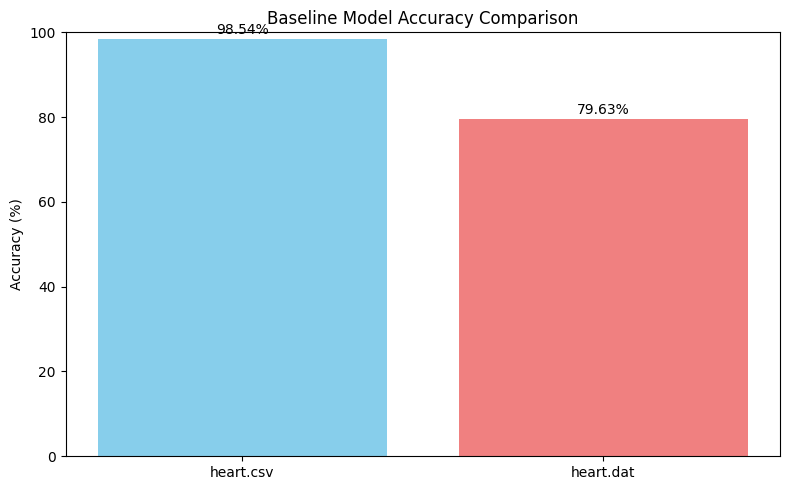

In [6]:
import matplotlib.pyplot as plt

# Baseline accuracies
datasets = ['heart.csv', 'heart.dat']
accuracies = [98.54, 79.63]  # Replace with your actual accuracy values

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(datasets, accuracies, color=['skyblue', 'lightcoral'])
plt.title('Baseline Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.text(0, accuracies[0] + 1, f"{accuracies[0]}%", ha='center')
plt.text(1, accuracies[1] + 1, f"{accuracies[1]}%", ha='center')
plt.tight_layout()
plt.savefig("baseline_accuracy_comparison.png")
plt.show()


Model Performance Comparison

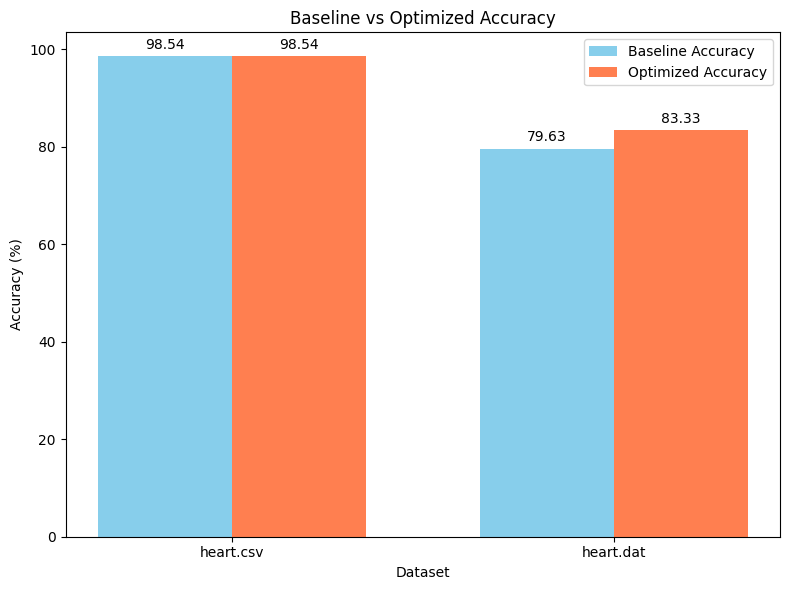

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data for bar chart
datasets = ['heart.csv', 'heart.dat']
baseline_accuracies = [98.54, 79.63]
optimized_accuracies = [98.54, 83.33]

x = np.arange(len(datasets))  # Label locations
width = 0.35  # Bar width

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, baseline_accuracies, width, label='Baseline Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, optimized_accuracies, width, label='Optimized Accuracy', color='coral')

# Add labels and title
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Baseline vs Optimized Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.legend()

# Add values above the bars
for bars in [bars1, bars2]:
    ax.bar_label(bars, fmt='%.2f', padding=3)

plt.tight_layout()
plt.savefig("model_comparison_accuracy.png")
plt.show()


Confusion Matrix

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix for heart.csv
ConfusionMatrixDisplay.from_estimator(rf_csv, X_csv_test, y_csv_test, cmap="Blues")
plt.title("Confusion Matrix - heart.csv")
plt.savefig("confusion_matrix_csv.png")
plt.show()

# Plot confusion matrix for heart.dat
ConfusionMatrixDisplay.from_estimator(rf_dat, X_dat_test, y_dat_test, cmap="Reds")
plt.title("Confusion Matrix - heart.dat")
plt.savefig("confusion_matrix_dat.png")
plt.show()


NameError: name 'rf_csv' is not defined

Data Distribution Visualization

In [ ]:
# Visualize class distribution for heart.dat
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x=y_dat, palette="Reds")
plt.title("Class Distribution - heart.dat")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.savefig("class_distribution_dat.png")
plt.show()


bar chart

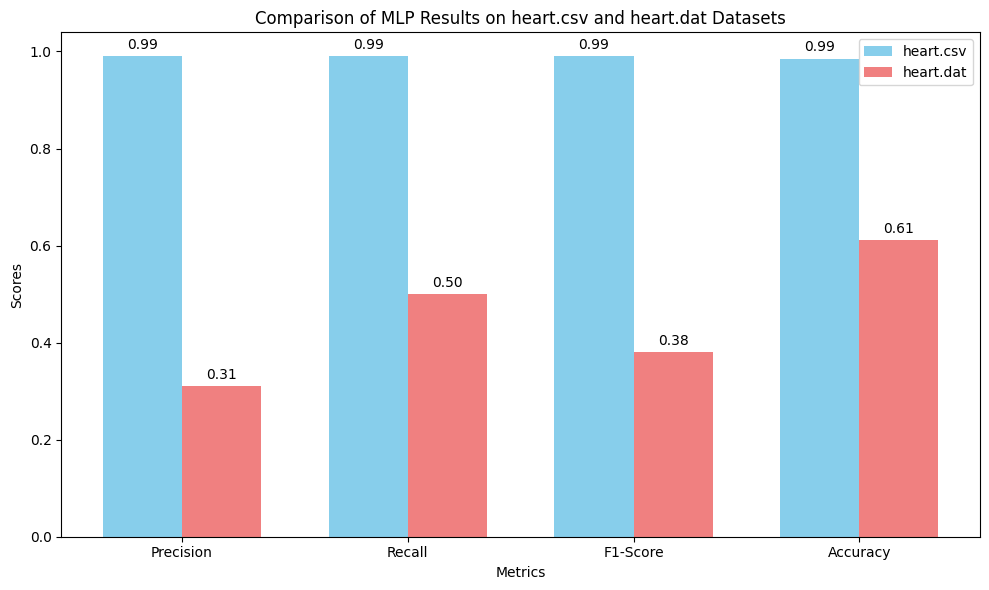

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Data for heart.csv and heart.dat datasets
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
csv_values = [0.99, 0.99, 0.99, 0.9854]  # heart.csv dataset
dat_values = [0.31, 0.50, 0.38, 0.6111]  # heart.dat dataset

# Create a bar chart
x = np.arange(len(metrics))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, csv_values, width, label='heart.csv', color='skyblue')
bars2 = ax.bar(x + width/2, dat_values, width, label='heart.dat', color='lightcoral')

# Add labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of MLP Results on heart.csv and heart.dat Datasets')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add value labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

# Show the chart
plt.tight_layout()
plt.savefig('mlp_comparison_chart.png')
plt.show()


Comparison of SVM Results on heart.csv and heart.dat Datasets

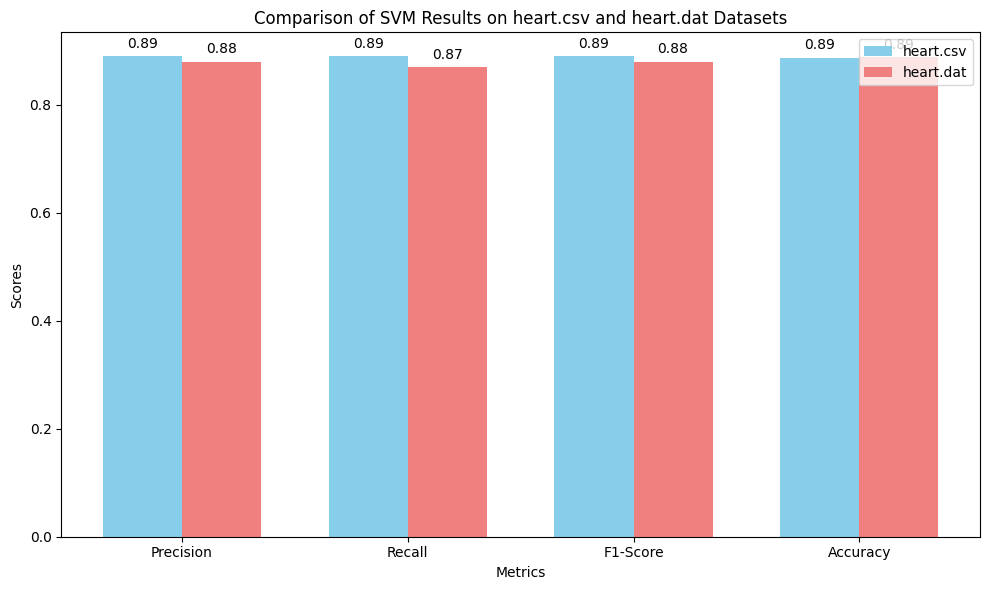

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Data for SVM Results
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
heart_csv_values = [0.89, 0.89, 0.89, 0.8878]
heart_dat_values = [0.88, 0.87, 0.88, 0.8889]

x = np.arange(len(metrics))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, heart_csv_values, width, label='heart.csv', color='skyblue')
bars2 = ax.bar(x + width/2, heart_dat_values, width, label='heart.dat', color='lightcoral')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of SVM Results on heart.csv and heart.dat Datasets')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add values above bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


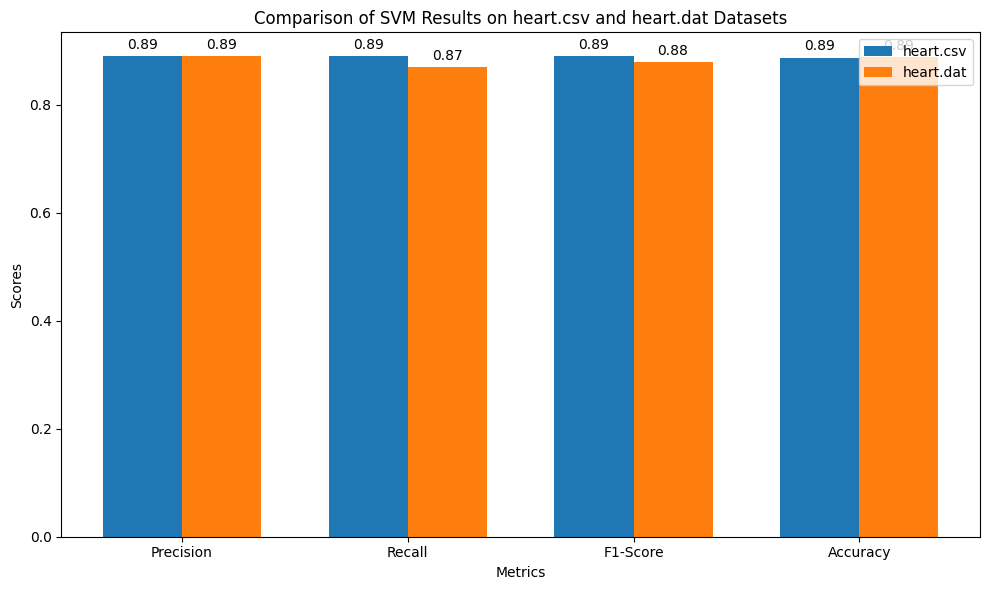

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data for heart.csv and heart.dat datasets
datasets = ['heart.csv', 'heart.dat']
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
heart_csv_scores = [0.89, 0.89, 0.89, 0.8878]
heart_dat_scores = [0.89, 0.87, 0.88, 0.8889]

# Create a bar chart
x = np.arange(len(metrics))
width = 0.35  # Width of bars

fig, ax = plt.subplots(figsize=(10, 6))
bars_csv = ax.bar(x - width/2, heart_csv_scores, width, label='heart.csv')
bars_dat = ax.bar(x + width/2, heart_dat_scores, width, label='heart.dat')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of SVM Results on heart.csv and heart.dat Datasets')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add data labels on bars
for bars in [bars_csv, bars_dat]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()
